In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import math

from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)

from IPython.display import Image
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
sr_ = Style.RESET_ALL

In [2]:
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.colors import n_colors
from plotly.subplots import make_subplots

In [3]:
custom_colors = ["#ff6b6b","#95d5b2","#a2d2ff","#72efdd"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))

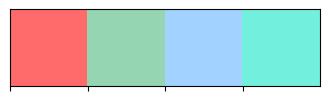

In [4]:
sns.palplot(sns.color_palette(custom_colors),size=1)

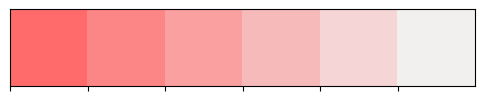

In [5]:
netflix_p = sns.light_palette(custom_colors[0], reverse=True)
sns.palplot(sns.color_palette(netflix_p),size=1)

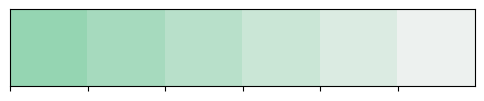

In [6]:
hulu_p = sns.light_palette(custom_colors[1], reverse=True)
sns.palplot(sns.color_palette(hulu_p),size=1)

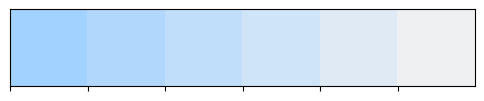

In [7]:

prime_p = sns.light_palette(custom_colors[2], reverse=True)
sns.palplot(sns.color_palette(prime_p),size=1)

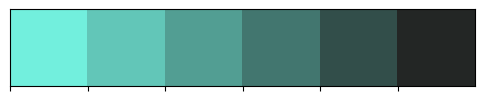

In [8]:
disney_p = sns.dark_palette(custom_colors[3], reverse=True)
sns.palplot(sns.color_palette(disney_p),size=1)

In [9]:
df_tv = pd.read_csv('tv_shows.csv')

In [10]:
df_tv = df_tv.drop(['Unnamed: 0'], axis = 1) 
df_tv.head(5)

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1


In [11]:
def splitting(dataframe,col):
    result = dataframe[col].str.get_dummies(',')
    print('Done!')
    return result

In [12]:
def val_sum(df,c):
    return df[c].sum(axis=0)

In [13]:
val_counts = []
dfs = [df_tv]
cols = ['Netflix','Hulu','Prime Video','Disney+']

for x in dfs:
    for y in cols:
        val_counts.append(val_sum(x,y))

In [14]:
val_counts

[1971, 1621, 1831, 351]

In [15]:
def donut(i,df,sizes,title):
    plt.subplot(i)
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
                autopct='%1.1f%%', shadow=True)

    centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=1.25)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(title)
    plt.axis('equal')

val_counts: [1971, 1621, 1831, 351]
Length of val_counts: 4


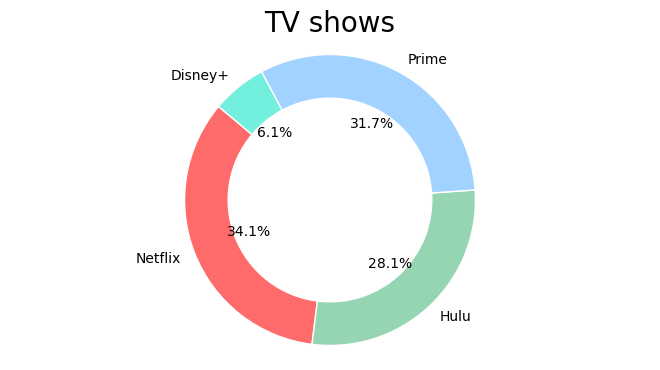

In [16]:
print("val_counts:", val_counts)
print("Length of val_counts:", len(val_counts))

fig, ax = plt.subplots(figsize=(16, 8))

labels = ['Netflix', 'Hulu', 'Prime', 'Disney+']
sizes = [val_counts[0], val_counts[1], val_counts[2], val_counts[3]]
colors = custom_colors
explode = (0, 0, 0, 0)

wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, wedgeprops=dict(width=0.3, edgecolor='w'))

ax.axis('equal')

plt.subplots_adjust(left=0.3, right=0.7, top=0.7, bottom=0.3)
plt.title('TV shows', fontsize=20)
plt.show()




In [21]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


val_counts = [1971, 1621, 1831, 351]

fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Indicator(
    mode = "number",
    value = val_counts[0],
    number = {'font':{'color': custom_colors[2],'size':100}},
    title = {"text": "TV Shows<br><span style='font-size:0.8em;color:gray'>On Netflix</span>"},
    domain = {'x': [0.5, 1], 'y': [0, 0.4]}
))

fig.add_trace(go.Indicator(
    mode = "number",
    value = val_counts[1],
    number = {'font':{'color': custom_colors[2],'size':100}},
    title = {"text": "TV Shows<br><span style='font-size:0.8em;color:gray'>On Hulu</span>"},
    domain = {'x': [0, 0.5], 'y': [0, 0.4]}
))

fig.add_trace(go.Indicator(
    mode = "number",
    value = val_counts[2],
    number = {'font':{'color': custom_colors[2],'size':100}},
    title = {"text": "TV Shows<br><span style='font-size:0.8em;color:gray'>On Prime</span>"},
    domain = {'x': [0, 0.5], 'y': [0.5, 1]}
))

fig.add_trace(go.Indicator(
    mode = "number",
    value = val_counts[3],
    number = {'font':{'color': custom_colors[2],'size':100}},
    title = {"text": "TV Shows<br><span style='font-size:0.8em;color:gray'>On Disney+</span>"},
    domain = {'x': [0.5, 1], 'y': [0.5, 1]}
))

fig.update_layout(height=800)
fig.show()


In [ ]:
df_tv['IMDb'] = df_tv['IMDb'].str.split('/').str[0]
df_tv['Rotten Tomatoes'] = df_tv['Rotten Tomatoes'].str.split('/').str[0]

In [ ]:
def sunburst(dataframe,platform,c):
    dataframe=dataframe.loc[dataframe[platform] == 1]
    dataframe=dataframe.sort_values(by='IMDb', ascending=False)
    rating = dataframe[0:10]
    fig =px.sunburst(
    rating,
    path=['Title','Genres'],
    values='IMDb',
    color='IMDb',
    color_continuous_scale=c)
    fig.show()

In [ ]:
def kde(i,dataframe,platform,c):
    plt.subplot(i)
    dataframe=dataframe.loc[dataframe[platform] == 1]
    sns.kdeplot(data=dataframe['Runtime'], color=custom_colors[c],shade=True)
    plt.xlabel('Runtime in minutes', fontsize = 15)
    plt.legend(fontsize = 15);
    plt.subplot(i+1)
    sns.kdeplot(data=dataframe['Year'], color=custom_colors[c],shade=True)
    plt.xlabel('Release Year', fontsize = 15)
    plt.legend(fontsize = 15);

In [ ]:
df_t = df_tv.copy()
df_t = df_t[df_t['Age'].notna()]

In [ ]:
df_t['Age']=df_t['Age'].str.replace('+','')
df_t['Age']=df_t['Age'].str.replace('all','0')
df_t['Age']=df_t['Age'].astype(str).astype(int)

In [ ]:
def barplot(i,dataframe,platform,p):
    plt.subplot(i)
    dataframe=dataframe.loc[dataframe[platform] == 1]
    dataframe = dataframe['Age'].value_counts().reset_index()
    dataframe.columns=['age','count']
    sns.barplot(x="age", y="count", data=dataframe,palette=p)
    plt.xlabel('Age', fontsize = 15)
    plt.ylabel(platform, fontsize = 15)

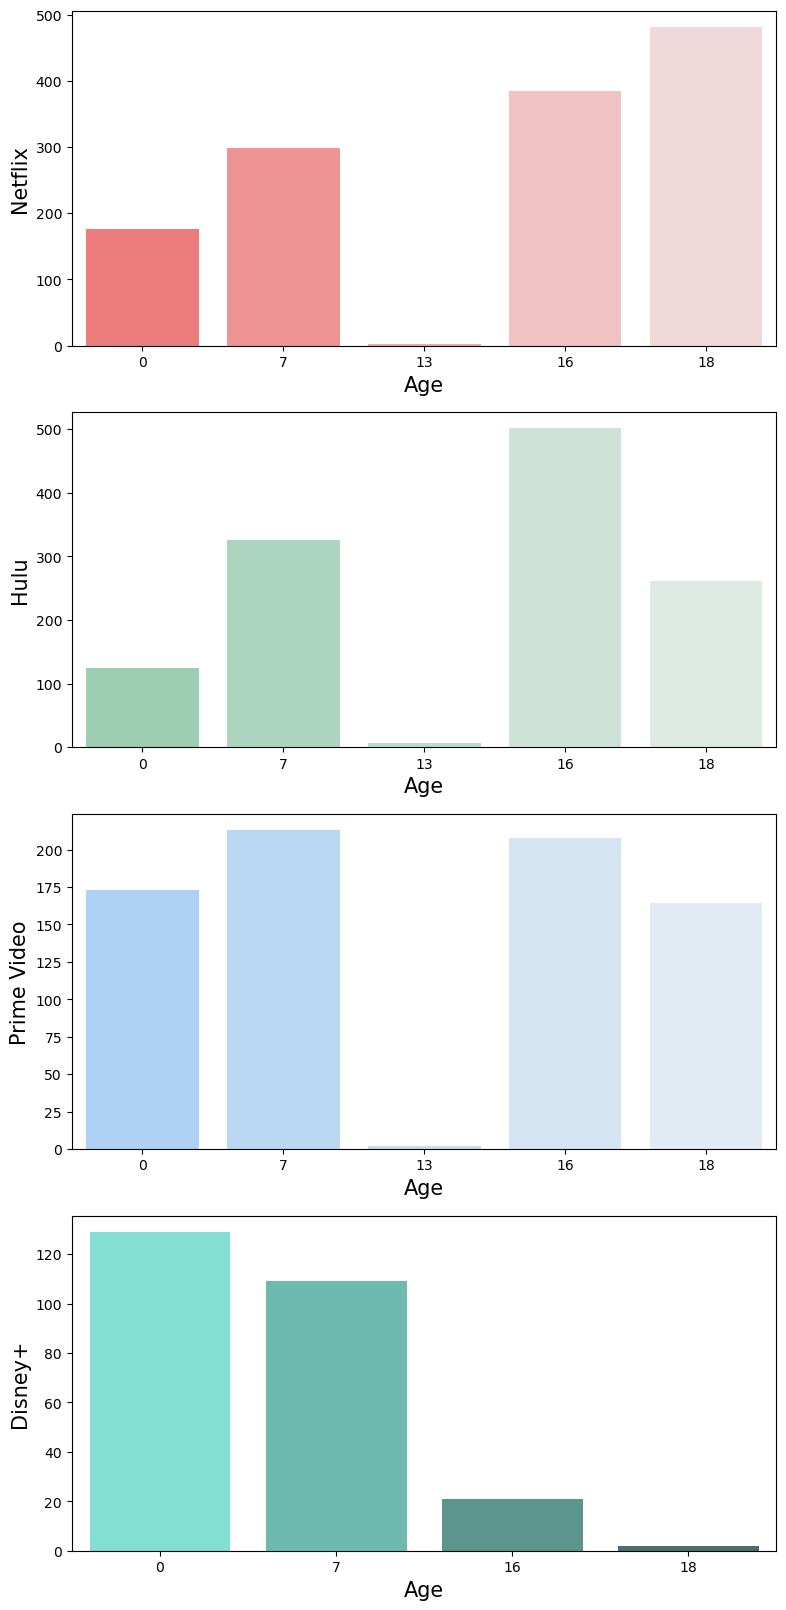

In [ ]:
plt.figure(figsize = (20, 20))

barplot(421,df_t,'Netflix',netflix_p)
barplot(423,df_t,'Hulu',hulu_p)
barplot(425,df_t,'Prime Video',prime_p)
barplot(427,df_t,'Disney+',disney_p)

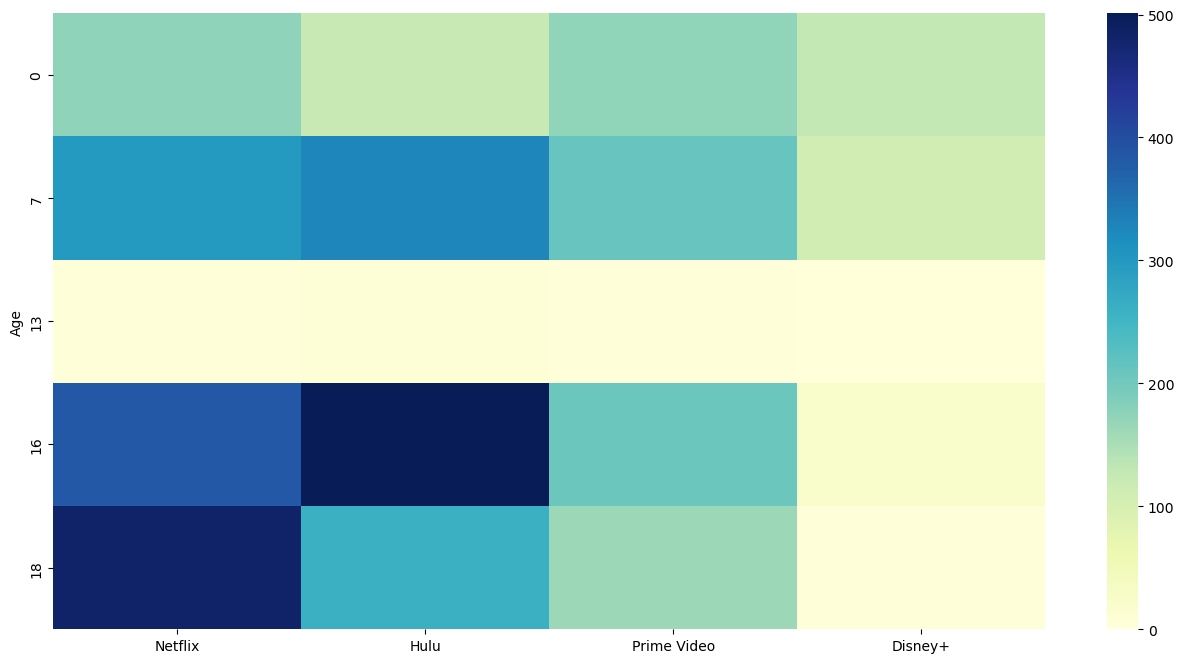

In [ ]:
plt.figure(figsize = (16, 8))
tv_age = df_t.groupby('Age')[['Netflix','Hulu','Prime Video','Disney+']].sum()
sns.heatmap(tv_age,cmap="YlGnBu")
plt.show()

In [ ]:
r = df_tv.sort_values(by='IMDb', ascending=False)
r = r[0:20]
r = r[['Title','IMDb','Netflix','Hulu','Prime Video','Disney+']]
r['IMDb'] = r['IMDb'].astype(float)

In [ ]:
r.style.bar(subset=["Netflix"], color='#ff6b6b')\
.bar(subset=["Hulu"], color='#95d5b2')\
.bar(subset=["Prime Video"], color='#a2d2ff')\
.bar(subset=["Disney+"], color='#72efdd')\
.bar(subset=["IMDb"], color='#').background_gradient(cmap='Purples')

,Title,IMDb,Netflix,Hulu,Prime Video,Disney+
3802,The Secret World of Nature: Spain,9.600000,0,0,1,0
5077,Bluey,9.600000,0,0,0,1
3611,Malgudi Days,9.500000,0,0,1,0
0,Breaking Bad,9.400000,1,0,0,0
5277,Alaska Animal Rescue,9.400000,0,0,0,1
80,Our Planet,9.300000,1,0,0,0
3115,Hungry Henry,9.300000,0,1,0,0
3760,Everyday Driver,9.300000,0,0,1,0
2009,Cosmos,9.300000,0,1,1,1
5,Avatar: The Last Airbender,9.300000,1,0,1,0
